# Assignment 3: Simulations and the Central Limit Theorem

This assignment covers **Chapters 9-10** from the textbook as well as lecture material from Weeks 5-6. Please complete this assignment by providing answers in cells after the question. Use **Code** cells to write and run any code you need to answer the question and **Markdown** cells to write out answers in words. After you are finished with the assignment, remember to download it as an **HTML file** and submit it in **ELMS**.

This assignment is due by **11:59pm on Friday, October 4**. Revisions are due by **11:59pm on Friday, October 11**.

In [1]:
import numpy as np
from datascience import *


# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots

# This is if you want your plots to have the FiveThirtyEight style
plots.style.use('fivethirtyeight')

### Question 1. Rolling Dice



**a)** Define a function called `die_roll` with no parameters that randomly "rolls a die" (that is, randomly generates a number from one to six) and returns the result. Then, define a function called `mean_roll` with one parameter (`num`) that calls `die_roll` and returns the mean of `num` die rolls.

For example, if you want to roll a die 20 times and find the mean of those 20 rolls, you should be able to use:
   
    mean_roll(num = 20)
    
Find the mean of rolling a die 50 times. (Note: Due to randomness, not everyone will have the same answer)

In [2]:
def die_roll():
    die = np.arange(1,7)
    rdm = np.random.choice(die)
    return rdm

In [3]:
die_roll()

1

In [4]:
def mean_roll(num):
    rolls = make_array()
    for i in np.arange(num):
        rolls = np.append(rolls,die_roll())
    mean_val = np.mean(rolls)
    return mean_val

In [5]:
mean_roll(num = 50)

3.54

**b)** Repeat the process of 50 die rolls 1000 times and record the mean of each trial. Store the 1000 means in an array called `dice_means`. (**Hint:** Don't try to manually do the 1000 trials of 50 rolls! Use a `for` loop!)

In [6]:
dice_means = make_array()

for i in np.arange(1000):
    dice_means = np.append(dice_means, mean_roll(num = 50))

**c)** Describe the distribution of the 1000 means. Use numerical and graphical summaries. What is the shape? The center? The spread?

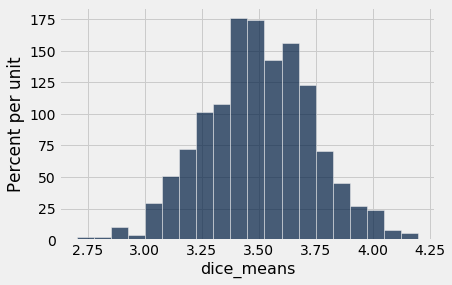

In [7]:
dice_means_table = Table().with_column('dice_means', dice_means)
dice_means_table.hist('dice_means',bins=20)

In [8]:
dice_means_table.stats()

statistic,dice_means
min,2.7
max,4.2
median,3.5
sum,3497.86


In [9]:
np.mean(dice_means_table)

//anaconda3/lib/python3.7/site-packages/datascience/tables.py:193: FutureWarning: Implicit column method lookup is deprecated.
  warnings.warn("Implicit column method lookup is deprecated.", FutureWarning)


dice_means
3.49786


In [10]:
np.std(dice_means_table)

dice_means
0.237205


> The center of the distribution seems be around 3.5. The mean and the median are both very close to 3.5, suggesting a symmetric distribution. The histogram supports this, with a unimodal, bell-shaped distribution that looks approximately symmetric. The standard deviation of the means is approximately 0.24, and the range is approximately 2 (between 2.48 and 4.34).

**d)** On average, the theoretical mean die roll should be 3.5. That is, if all of the numbers are equally likely, then each number has a 1/6 chance of being selected, giving an expected value of 3.5. However, as you may have noticed from the above simulations, there was some variation -- while most of the means were close to 3.5, they were slightly off due to randomness. Still, there was a range of values that were likely to be the mean, centered around approximately 3.5. Based on the distribution from part **c)**, what at values of the mean would you consider to be highly unlikely? 

> Looking at the histogram, it looks like values close to 3.0 and below or 4.0 and above are highly unlikely. Even though there are a few means that ended up outside the range of 3.0 to 4.0, not very many did.

**e)** Suppose we were to change the 50 rolls to 200 rolls per trial instead. How would you expect the distribution of the means to change? Repeat part **b)** and **c)** using 200 instead of 50 and comment on any differences between the two.

In [11]:
dice_means_200 = make_array()

for i in np.arange(1000):
    dice_means_200 = np.append(dice_means_200, mean_roll(num = 200))


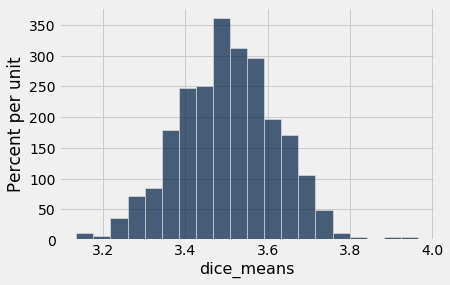

In [12]:
dice_table_200 = Table().with_column('dice_means', dice_means_200)
dice_table_200.hist('dice_means',bins=20)

In [13]:
dice_table_200.stats()

statistic,dice_means
min,3.135
max,3.965
median,3.505
sum,3501.95


In [14]:
np.mean(dice_table_200)

dice_means
3.50194


In [15]:
np.std(dice_table_200)

dice_means
0.12062


> Since the sample size is much higher (by a factor of 4), we would expect the spread of the distribution to be narrower. We see this happening in the simulation, with most of the means falling between 3.2 and 3.8. The mean and median stay very close to 3.5. The standard deviation is approximately half of what it was with a sample size of 50, as might be expected when increasing the sample size by a factor of 4.

**f)** Suppose we were to change the 50 rolls to 15 rolls per trial instead. How would you expect the distribution of the means to change? Repeat part **b)** and **c)** using 15 instead of 50 and comment on any differences between the two.

In [16]:
dice_means_15 = make_array()

for i in np.arange(1000):
    dice_means_15 = np.append(dice_means_15, mean_roll(num = 15))

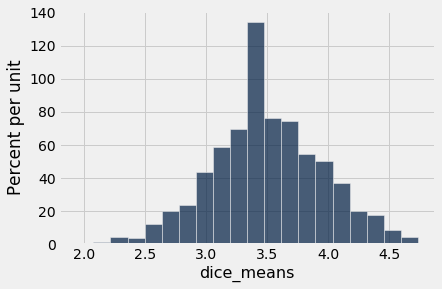

In [17]:
dice_table_15 = Table().with_column('dice_means', dice_means_15)
dice_table_15.hist('dice_means',bins=20)

In [18]:
dice_table_15.stats()

statistic,dice_means
min,1.93333
max,4.73333
median,3.46667
sum,3493


In [19]:
np.mean(dice_table_15)

dice_means
3.493


In [20]:
np.std(dice_table_15)

dice_means
0.45547


> Since the sample size is now lower, we would expect the spread of the distribution to be wider. We see this happening in the simulation, with most of the means falling between 2.5 and 4.5. The mean and median stay very close to 3.5, but the spread is much higher.

**g)** Suppose you are playing a game when you suddenly suspect that one of the dice being used is weighted to roll lower numbers more often. You secretly test it out by rolling it 50 times, and find that the mean of those 50 rolls for this die is 2.8. Does this provide evidence that the die is weighted? 

> Let's look at the distribution of the simulation with a sample size of 50 again. 

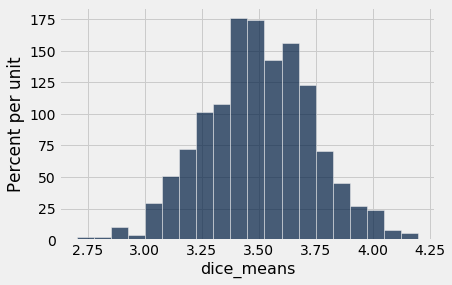

In [21]:
dice_means_table.hist('dice_means',bins=20)

> These simulations were done with a fair die, and show what we might expect the means of 50 die rolls to be with that fair die. We see in this histogram that a value of 2.8 would be very unlikely to happen, and is on the tails of the distribution. Because of this, we might say that this provides evidence that the die is weight and is not actually fair.

### Question 2. Ghosts and Income

Suppose we wanted to answer the following question:

**Does income differ according to belief in ghosts?**

This is something we can use the Cards Against Humanity Pulse of the Nation poll to try to answer. For your convenience, we have made a subset of the data available to you in a CSV file called `201709-CAH_PulseOfTheNation.csv`. 

In [22]:
cah = Table.read_table('201709-CAH_PulseOfTheNation.csv')

**a)** The question `'Do you believe in ghosts?'` has three categories: `Yes`, `No`, and `DK/REF`. To simplify our analysis, let's first take out the `DK/REF` group. Subset the data to remove each row containing `DK/REF` for the ghosts question.

In [23]:
# First confirm that there are only three categories.
cah.group('Do you believe in ghosts?')

Do you believe in ghosts?,count
DK/REF,8
No,187
Yes,115


In [24]:
# We'll also relabel the ghosts questions to make it easier to use.
cah_clean = cah.where('Do you believe in ghosts?',are.not_equal_to('DK/REF')).relabeled('Do you believe in ghosts?','ghosts')


**b)** Describe the `Income` and `Do you believe in ghosts?` variables. How do the incomes differ between the two groups?

In [25]:
cah_clean.select('Income','ghosts').group('ghosts', np.mean)

ghosts,Income mean
No,92566.8
Yes,97130.4


In [26]:
cah_clean.select('Income','ghosts').group('ghosts', np.median)

ghosts,Income median
No,74000
Yes,79000


In [27]:
cah_clean.select('Income','ghosts').group('ghosts', np.std)

ghosts,Income std
No,74290.8
Yes,81060.2


Text(0.5, 1.0, 'Income of Ghost Believers')

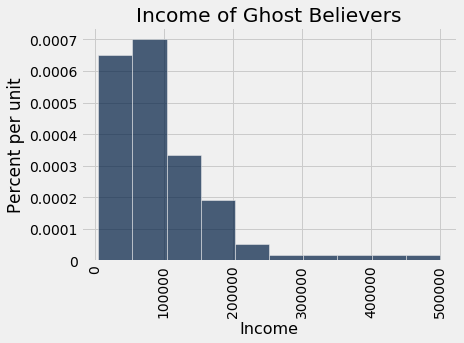

In [28]:
cah_clean.select('Income','ghosts').where('ghosts','Yes').hist('Income')
plots.title('Income of Ghost Believers')

Text(0.5, 1.0, 'Income of Ghost Non-believers')

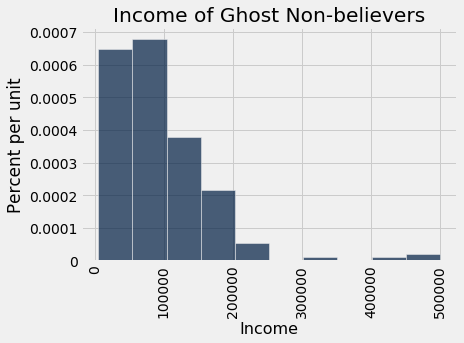

In [29]:
cah_clean.select('Income','ghosts').where('ghosts','No').hist('Income')
plots.title('Income of Ghost Non-believers')

> The mean and median of income seem to be slightly higher for the "Yes" group. The standard deviation of the "Yes" group is also slightly higher. Both histograms look right skewed, with a long right tail.

**c)** Just from observing the data, it can be hard to tell if there is a real difference, or if the difference is due to random chance. One way of deciding whether a difference is too big to be attributed to random chance is through simulations.

To simulate a situation in which these variables are unrelated, we can **shuffle** the ghosts variable, randomizing who answered `Yes` and who answered `No` to that question. This ensures that the two variables are unrelated (since one of them is now chosen at random). Then, we can see what kind of differences we observe in `Income` between the two groups.

Create a new Table called `shuffled_ghosts` with shuffled answers for the ghosts question.

**Hint:** First, create a table called `shuffled_ghosts` with the same Table as in `cah`. Then, use `np.random.shuffle` to shuffle just the ghosts column in `shuffled_ghosts`.

In [30]:
shuffled_ghosts = cah_clean
np.random.shuffle(shuffled_ghosts.column('ghosts'))

**d)** What is the difference in mean Income between the two groups in the shuffled data? Present your answer as "Yes group Income" - "No group Income", with the proper sign (that is, the number should be negative if the "No group Income" is higher.

In [31]:
mean_tab = shuffled_ghosts.select('Income','ghosts').group('ghosts', np.mean)
mean_tab.column('Income mean')[1] - mean_tab.column('Income mean')[0]

2063.8921181120677

> Note that due to randomness, the difference will be different every time. The above answer is the difference.

**e)** Create an array called `income_diff`. Repeat the shuffling 1000 times, and record the difference in Income between the two groups for each in `income_diff`.

In [32]:
# Let's first make a function that finds this difference after shuffling
def shuffle_mean():
    np.random.shuffle(shuffled_ghosts.column('ghosts'))
    mean_tab = shuffled_ghosts.select('Income','ghosts').group('ghosts', np.mean)
    return mean_tab.column('Income mean')[1] - mean_tab.column('Income mean')[0]

In [33]:
income_diff = make_array()

for i in np.arange(1000):
    income_diff = np.append(income_diff, shuffle_mean())

**f)** Use numerical and graphical summaries to describe the distribution of `income_diff`. 

In [34]:
diff = Table().with_columns('Income Difference', income_diff)
diff.stats()

statistic,Income Difference
min,-23522.9
max,28577.5
median,-386.654
sum,-411960


In [35]:
np.mean(diff)

Income Difference
-411.96


In [36]:
np.std(diff)

Income Difference
8886.84


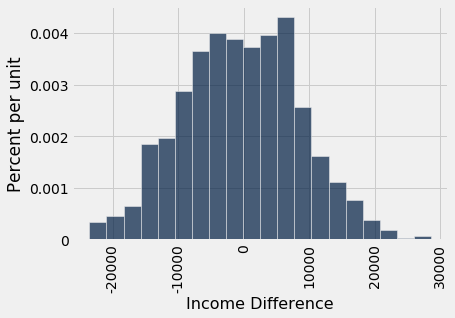

In [37]:
diff.hist(bins=20)

> The histogram shows that the center of the distribution is very close to 0, and the mean and the median are quite low, supporting this conclusion. They are also very close to each other, indicating a symmetric distribution. The histogram supports this, and shows a unimodal bell-shaped distribution. The standard deviation is about 9,300, and the most of the difference in means is between -20,000 and 20,000.

**g)** Do you think that the difference you found in part **b)** could be due to random chance? Or is it unlikely to be due to random chance, and should be considered a significant difference between the two groups?

> Yes, it could be due to random chance. The difference we found in part b was less than 10,000. This is still within the range of reasonable values if there were no real difference between the two groups. Our simulation showed that anything between -20,000 and 20,000 as the difference between the means is a reasonable and could happen due to random chance.

**h)** Suppose you had found a significant difference in part **g)** (whether or not you did). Would you be able to say that belief in ghosts causes a difference in income?

> We can't make a statement about causation because this was not an experiment. These are simply correlated, and there could be various confounding factors that might explain why there is a relationship.